<a href="https://colab.research.google.com/github/chunyip135/Collections-of-Applications-of-Deep-Learning/blob/master/Simple_MNIST_using_covnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import required libraries

In [20]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

# Normalization

In [6]:
x_train = X_train.astype("float32") / 255
x_test = X_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
print("X_train shape:", X_train.shape)
print(X_train.shape[0], "train samples")
print(X_test.shape[0], "test samples")

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [13]:
input_shape = X_train[0].shape

In [10]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# Creating model

In [15]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

# Compiling & training

In [18]:
batch_size = 128 # how many training data are trained 
epochs = 50 # training iteration

early_stopping = keras.callbacks.EarlyStopping(patience=4)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, callbacks = early_stopping)

Epoch 1/50
375/375 [==============================] - 2s 5ms/step - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.0303 - val_accuracy: 0.9914
Epoch 2/50
375/375 [==============================] - 2s 4ms/step - loss: 0.0378 - accuracy: 0.9876 - val_loss: 0.0362 - val_accuracy: 0.9898
Epoch 3/50
375/375 [==============================] - 2s 4ms/step - loss: 0.0394 - accuracy: 0.9875 - val_loss: 0.0366 - val_accuracy: 0.9908
Epoch 4/50
375/375 [==============================] - 2s 4ms/step - loss: 0.0359 - accuracy: 0.9883 - val_loss: 0.0389 - val_accuracy: 0.9909
Epoch 5/50
375/375 [==============================] - 2s 4ms/step - loss: 0.0354 - accuracy: 0.9887 - val_loss: 0.0400 - val_accuracy: 0.9902


# Evaluation

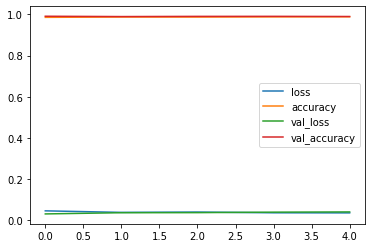

In [22]:
df = pd.DataFrame(history.history)
df.plot()

In [25]:
score = model.evaluate(X_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03942146524786949
Test accuracy: 0.9886000156402588
